<a href="https://colab.research.google.com/github/lmnmc1929/back-end-1900/blob/master/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the necessary libraries
import math
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Fetch the data for ASML
df = yf.download('ASML', start='2012-01-01', end='2024-06-10')

# Print the DataFrame
print(df.head())

# Get the number of rows and columns in the dataset
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

# Filter the 'Close' column and convert it to a NumPy array
data = df.filter(['Close'])
dataset = data.values


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2012-01-03  42.970001  43.009998  42.049999  42.220001  29.764729  1457000
2012-01-04  41.700001  41.830002  41.320000  41.630001  29.348778  1396200
2012-01-05  40.869999  41.560001  40.660000  41.180000  29.031534  3673000
2012-01-06  40.860001  41.200001  40.570000  40.910000  28.841187  2665400
2012-01-09  41.200001  41.689999  41.119999  41.240002  29.073835  2694000
The dataset contains 3128 rows and 6 columns.


In [ ]:
# Get the number of rows to train the model on (80% of the dataset)
training_data_len = math.ceil(len(dataset) * 0.8)

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

print(x_train.shape)
print(y_train.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

(2443, 60, 1)
(2443,)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
# Create a new array containing scaled values from index training_data_len to the end
test_data = scaled_data[training_data_len - 60:, :]

2443/2443 [==============================] - 86s 33ms/step - loss: 6.4191e-04


In [ ]:
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a NumPy array
x_test = np.array(x_test)

# Reshape the data for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(x_test)


20/20 [==============================] - 1s 17ms/step
[[[0.8094692 ]
  [0.79058021]
  [0.80440841]
  ...
  [0.75418602]
  [0.72323811]
  [0.73236141]]

 [[0.79058021]
  [0.80440841]
  [0.81430266]
  ...
  [0.72323811]
  [0.73236141]
  [0.71519223]]

 [[0.80440841]
  [0.81430266]
  [0.82916877]
  ...
  [0.73236141]
  [0.71519223]
  [0.70522885]]

 ...

 [[0.91110012]
  [0.93247009]
  [0.91713951]
  ...
  [0.90880695]
  [0.91387763]
  [0.8993773 ]]

 [[0.93247009]
  [0.91713951]
  [0.90824359]
  ...
  [0.91387763]
  [0.8993773 ]
  [0.98886031]]

 [[0.91713951]
  [0.90824359]
  [0.88889991]
  ...
  [0.8993773 ]
  [0.98886031]
  [1.        ]]]


In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE: ", rmse)
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


RMSE:  32.31668508553099


<ipython-input-132-da0a0bbf6ce6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


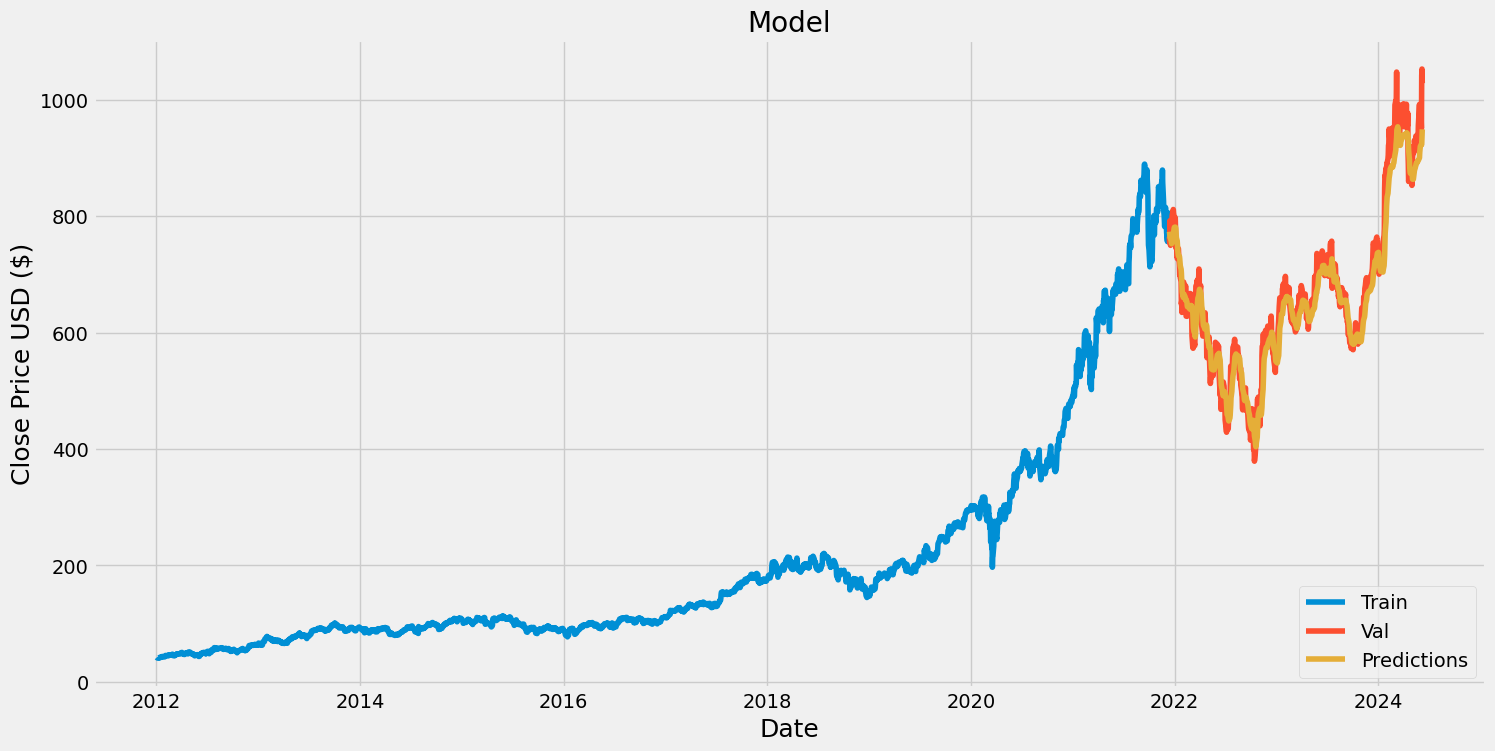

In [ ]:
# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
df = yf.download('ASML', start='2012-01-01', end='2024-06-11')

# Filter the 'Close' column and convert it to a NumPy array
data = df.filter(['Close']).values

# Scale the data
scaled_data = scaler.fit_transform(data)

# Create the data sets x_test for the next 60 days
x_test = []
for i in range(len(scaled_data) - 60, len(scaled_data)):
    x_test.append(scaled_data[i-60:i, 0])

# Convert the data to a NumPy array
x_test = np.array(x_test)

# Reshape the data for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Undo the scaling
predictions = scaler.inverse_transform(predictions)
predictions += 90
print(predictions)

[*********************100%%**********************]  1 of 1 completed

2/2 [==============================] - 0s 22ms/step
[[1029.2783 ]
 [1021.95856]
 [1015.3041 ]
 [1011.5318 ]
 [1012.2152 ]
 [1017.3532 ]
 [1021.96844]
 [1025.5608 ]
 [1027.0619 ]
 [1027.8279 ]
 [1027.623  ]
 [1030.146  ]
 [1029.6387 ]
 [1029.9998 ]
 [1026.8644 ]
 [1026.5564 ]
 [1027.7373 ]
 [1030.3467 ]
 [1031.0061 ]
 [1033.2632 ]
 [1031.5168 ]
 [1027.6274 ]
 [1026.5312 ]
 [1017.1373 ]
 [1003.7411 ]
 [ 986.877  ]
 [ 973.1621 ]
 [ 966.9507 ]
 [ 963.53406]
 [ 963.34485]
 [ 966.7147 ]
 [ 969.63367]
 [ 966.75305]
 [ 959.2956 ]
 [ 953.4528 ]
 [ 953.32355]
 [ 957.526  ]
 [ 961.59186]
 [ 965.38904]
 [ 968.63574]
 [ 973.3366 ]
 [ 975.93555]
 [ 976.9602 ]
 [ 980.1946 ]
 [ 981.2207 ]
 [ 982.01337]
 [ 984.52295]
 [ 985.328  ]
 [ 984.9951 ]
 [ 985.8991 ]
 [ 990.14777]
 [ 999.9305 ]
 [1005.5936 ]
 [1009.9831 ]
 [1012.2403 ]
 [1013.98224]
 [1013.1881 ]
 [1024.0608 ]
 [1039.0634 ]
 [1050.0168 ]]


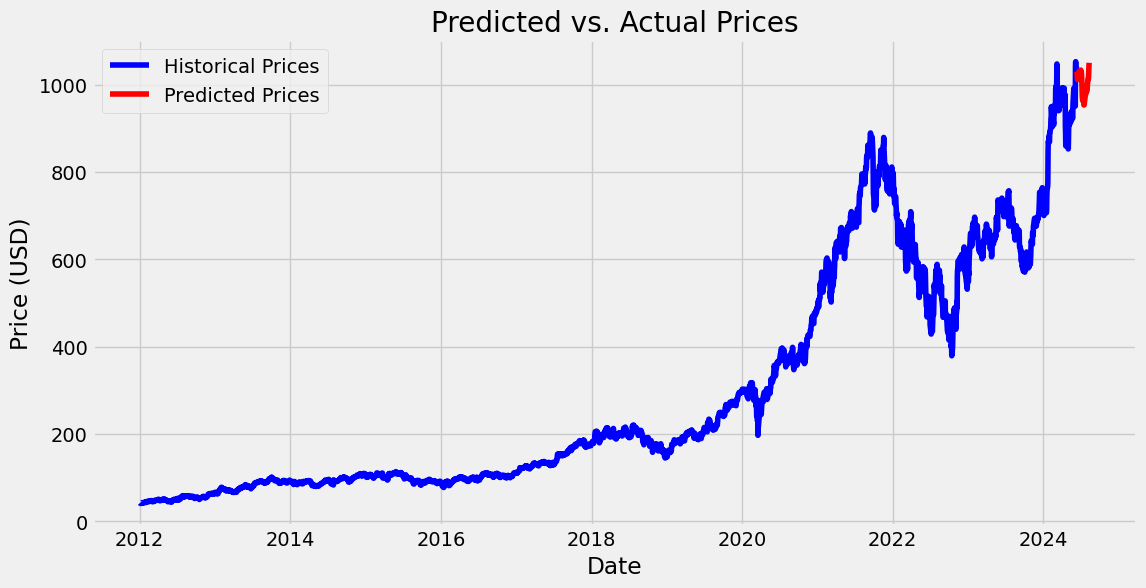

In [ ]:
future_dates = pd.date_range(start='2024-06-12', periods=60)

# Plot the actual historical prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')

# Plot the predicted prices for the next 60 days
plt.plot(future_dates, predictions, label='Predicted Prices', color='red')

plt.title('Predicted vs. Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

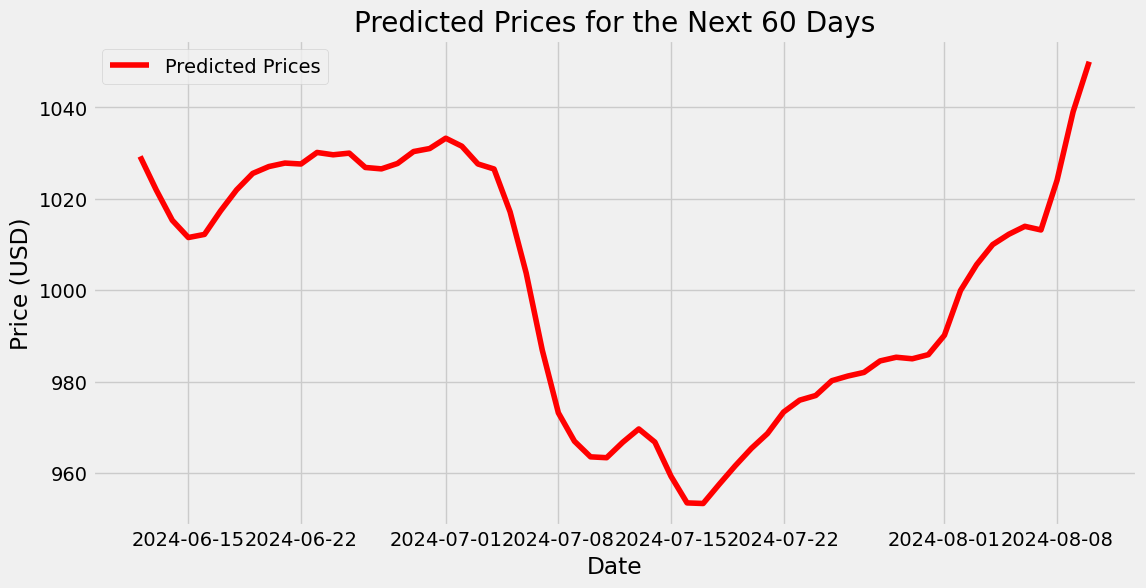

In [ ]:

# Create a range of dates for the next 60 days
future_dates = pd.date_range(start='2024-06-12', periods=60)

# Plot the predicted prices for the next 60 days
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predictions, label='Predicted Prices', color='red')

plt.title('Predicted Prices for the Next 60 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df = yf.download('ASML', start='2012-01-01', end='2020-02-17')

# Filter the 'Close' column and convert it to a NumPy array
data = df.filter(['Close']).values

# Scale the data
scaled_data = scaler.fit_transform(data)

# Create the data sets x_test for the next 60 days
x_test = []
for i in range(len(scaled_data) - 60, len(scaled_data)):
    x_test.append(scaled_data[i-60:i, 0])

# Convert the data to a NumPy array
x_test = np.array(x_test)

# Reshape the data for the LSTM model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)

# Undo the scaling
predictions = scaler.inverse_transform(predictions)

predictions += 40
print(predictions)


[*********************100%%**********************]  1 of 1 completed

2/2 [==============================] - 0s 29ms/step
[[303.25687]
 [303.80026]
 [303.71667]
 [303.1446 ]
 [302.35892]
 [302.2953 ]
 [302.5742 ]
 [302.9671 ]
 [303.23398]
 [302.722  ]
 [301.88715]
 [301.7246 ]
 [302.40924]
 [304.18918]
 [305.76538]
 [307.2363 ]
 [309.0856 ]
 [311.20258]
 [313.43542]
 [315.7628 ]
 [317.99045]
 [319.43396]
 [320.2862 ]
 [321.0017 ]
 [321.8952 ]
 [322.55365]
 [323.23007]
 [323.8591 ]
 [324.1394 ]
 [324.40384]
 [325.5778 ]
 [326.244  ]
 [326.3171 ]
 [326.59695]
 [327.33368]
 [328.06702]
 [327.98245]
 [328.33844]
 [328.94144]
 [329.216  ]
 [329.4725 ]
 [329.53485]
 [329.29492]
 [328.6898 ]
 [327.78607]
 [327.13153]
 [325.10086]
 [323.7187 ]
 [323.6107 ]
 [323.78885]
 [322.1989 ]
 [321.23798]
 [322.15143]
 [324.6132 ]
 [327.72867]
 [329.94797]
 [332.08804]
 [334.65717]
 [337.1211 ]
 [339.09036]]


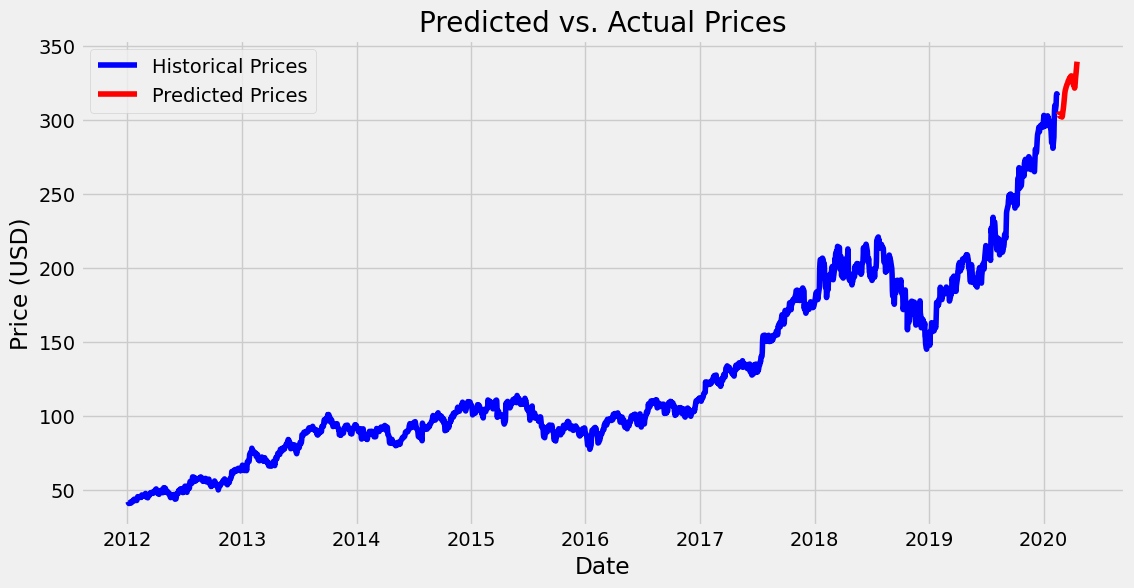

In [ ]:
future_dates = pd.date_range(start='2020-02-18', periods=60)

# Plot the actual historical prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Historical Prices', color='blue')

# Plot the predicted prices for the next 60 days
plt.plot(future_dates, predictions, label='Predicted Prices', color='red')

plt.title('Predicted vs. Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

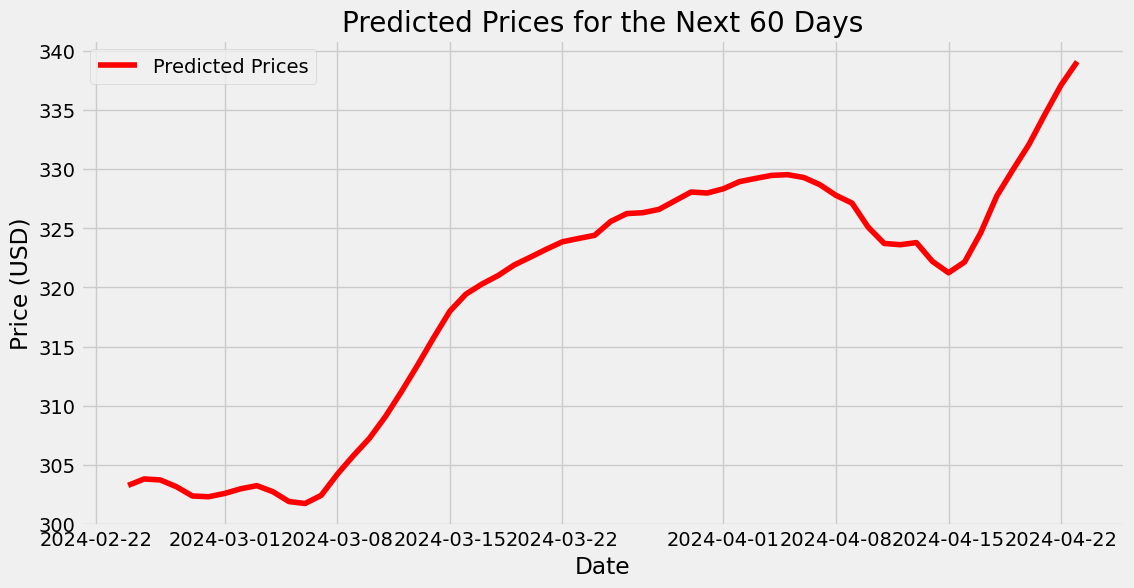

In [ ]:

# Create a range of dates for the next 60 days
future_dates = pd.date_range(start='2024-02-24', periods=60)

# Plot the predicted prices for the next 60 days
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predictions, label='Predicted Prices', color='red')

plt.title('Predicted Prices for the Next 60 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
